In [2]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica_ensamble as sle


# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_pickle('../../Datos_Mod1/df_encoded.pkl').reset_index(drop=True) # importo mi modelo más importante
df.head()

,Age_robust,Attrition,DistanceFromHome_robust,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,TotalWorkingYears_robust,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,...,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,1.153846,0,-0.083333,1.495430,-0.333333,-0.500000,-1.000000,-0.666667,-0.333333,-0.6,...,0.150606,0.149349,0.169076,0.142450,0.126116,0.057223,0.139531,0.112259,0.186013,0.155515
1,-0.384615,1,0.250000,-0.136563,-0.666667,1.500000,-0.444444,0.000000,0.000000,0.2,...,0.253988,0.155722,0.170456,0.187458,0.250556,0.175960,0.143672,0.160661,0.171167,0.163491
2,-0.307692,0,0.833333,2.631079,-0.333333,0.166667,-0.555556,0.000000,-0.333333,0.0,...,0.253988,0.155722,0.110225,0.172084,0.124242,0.172379,0.149717,0.160661,0.319268,0.152888
3,0.153846,0,-0.416667,0.618830,0.333333,-0.500000,0.333333,0.500000,2.000000,0.4,...,0.077491,0.156102,0.160580,0.134043,0.124242,0.147694,0.127563,0.116974,0.145384,0.163018
4,-0.307692,0,0.250000,-0.474223,0.666667,-0.333333,-0.111111,0.166667,-0.333333,0.2,...,0.149360,0.155841,0.165907,0.177812,0.258805,0.170352,0.138802,0.224400,0.146153,0.150490


In [35]:
df['MaritalStatus'].value_counts()

MaritalStatus
0.126116    416
0.124242    400
0.124242    400
0.125948    398
0.126412    396
0.256636    294
0.258805    284
0.250556    279
0.251444    279
0.253408    268
0.108296    199
0.108296    199
0.092719    198
0.098644    194
0.100052    185
Name: count, dtype: int64

## Regresión logística

In [5]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_logreg = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_logreg.head().T

,train,test
accuracy,0.843634,0.856492
precision,0.845077,0.855034
recall,0.843634,0.856492
f1,0.780779,0.802787
kappa,0.078708,0.125014
auc,0.766153,0.789273
time_seconds,0.002965,NaN
n_jobs,NaN,NaN
tiempo_computacion(segundos),NaN,0.002965
nucleos_usados,NaN,NaN


Nos da unas métricas relativamente buenas en general hasta llegar al Kappa, donde nos muestra que existe mucha aleatoriedad en sus predicciones. Esot nos indica que nuestra modelo a pesar de tener buenas métricas estas han sido fruto del azar.

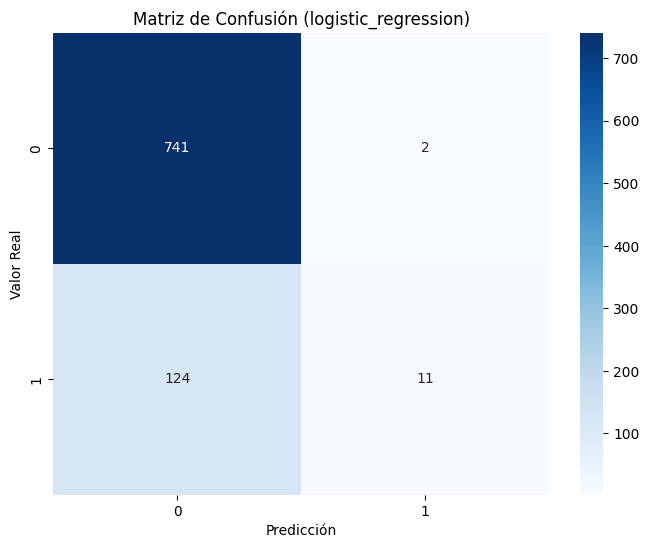

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 1\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


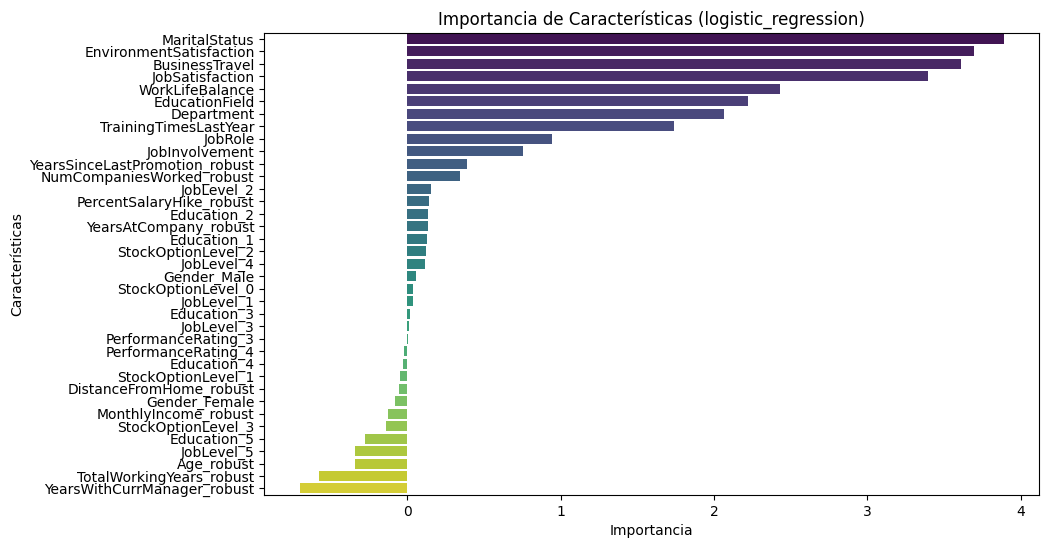

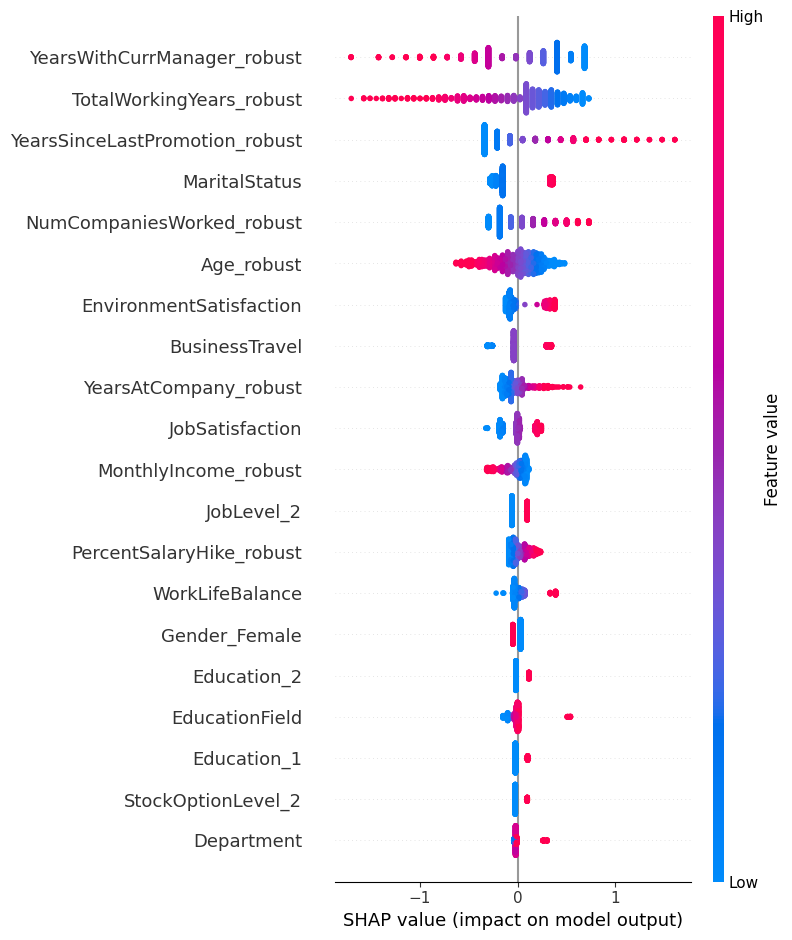

In [6]:
logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression') 
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

Genera un poco de sorpresa que haya acertado tanto en los verdaderos positivos y verdaderos negativos, a pesar del azar. Sin embargo, donde podemos ver las fallas es en los falsos negativos ya que me predice muchos casos donde los empleados no se irán pero sí lo hacen.

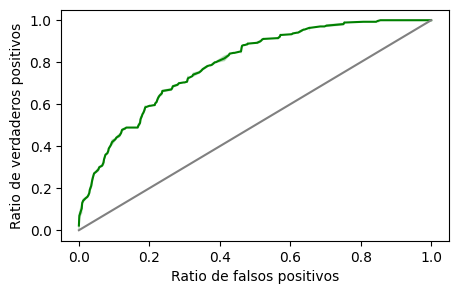

In [7]:
logistica.graficar_roc('logistic_regression')

## Decision Tree

In [8]:
params_grid_tree = {
                'max_depth': [9,10,12,15],
                'min_samples_split': [4,5,6],
                'min_samples_leaf': [1, 2, 4]
}

In [9]:
logistica.ajustar_modelo("tree", param_grid=params_grid_tree) # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_dectree = logistica.calcular_metricas(modelo_nombre =  "tree")
df_dectree.head().T

El mejor modelo es DecisionTreeClassifier(max_depth=15, min_samples_split=4)


,train,test
accuracy,0.988892,0.905467
precision,0.988893,0.902611
recall,0.988892,0.905467
f1,0.988783,0.903807
kappa,0.958545,0.624210
auc,0.998470,0.825338
time_seconds,0.004777,NaN
n_jobs,8.000000,NaN
tiempo_computacion(segundos),NaN,0.004777
nucleos_usados,NaN,8.000000


Aquí se puede apreciar algo de overfitting por la diferencia que vemos en nuestro train-test. Además de enormes diferencias para el kappa entre estos fos, por lo que no sería ideal apostar por este modelo.

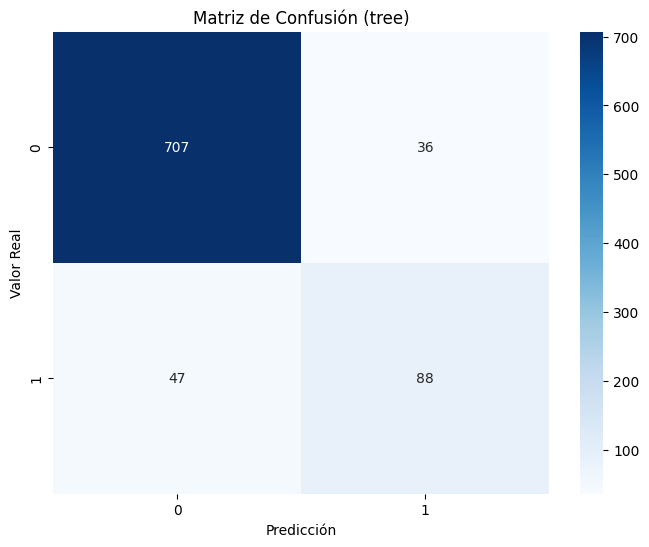

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 1\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


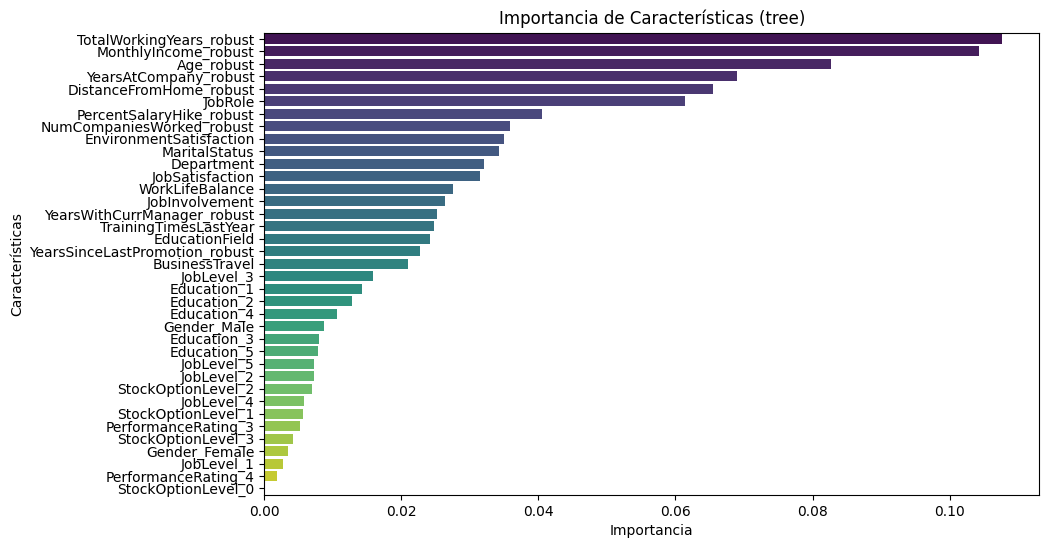

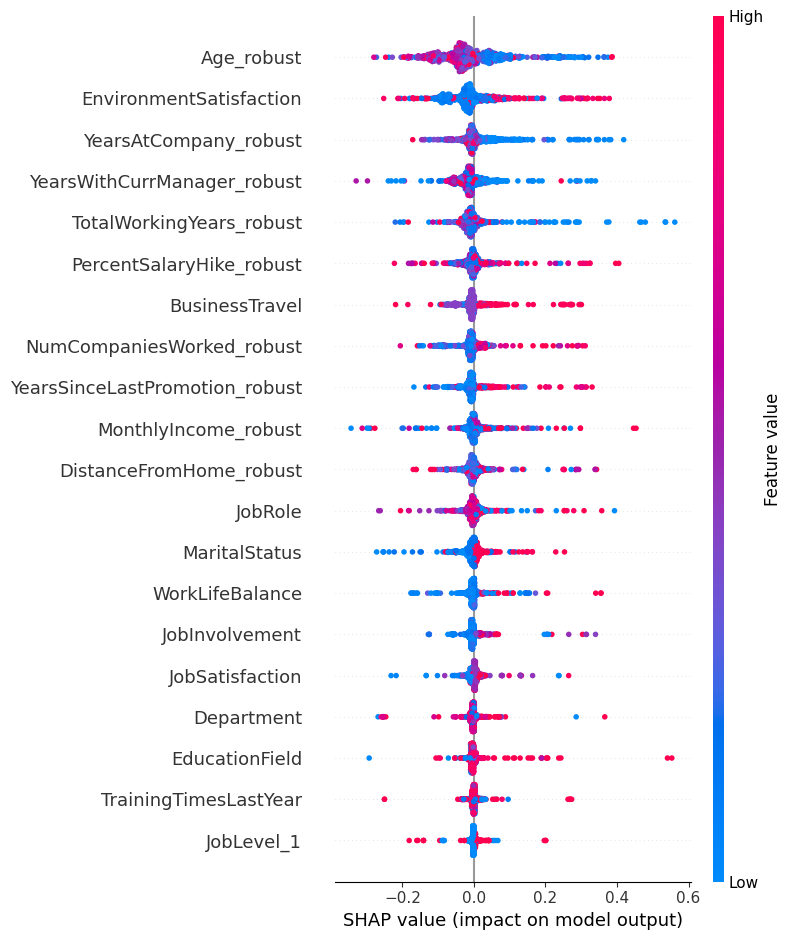

In [11]:
logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree') 
logistica.plot_shap_summary(modelo_nombre="tree")

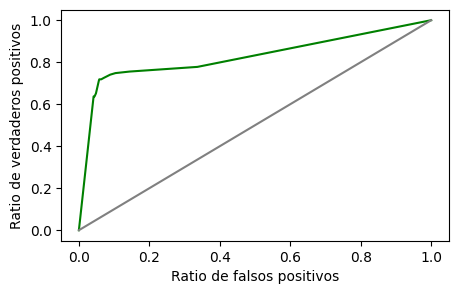

In [12]:
logistica.graficar_roc('tree')

# Random Forest

In [28]:
params_random =     {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

In [29]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest", param_grid=params_random)

# llamamos al metodo para obtener los resultaods de las predicciones
df_random = logistica.calcular_metricas(modelo_nombre =  "random_forest")
df_random.head()

El mejor modelo es RandomForestClassifier(max_depth=10, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.958132,0.960127,0.958132,0.955562,0.829060,0.999309,0.099889,-1.0,NaN,NaN
test,0.919134,0.926188,0.919134,0.906552,0.604057,0.969094,NaN,NaN,0.099889,-1.0


Tiene muy buenas métricas, en sentido general pero volvemos a observar que en cuanto a Kappa existe mucha divererncia en estos dos grupos. 

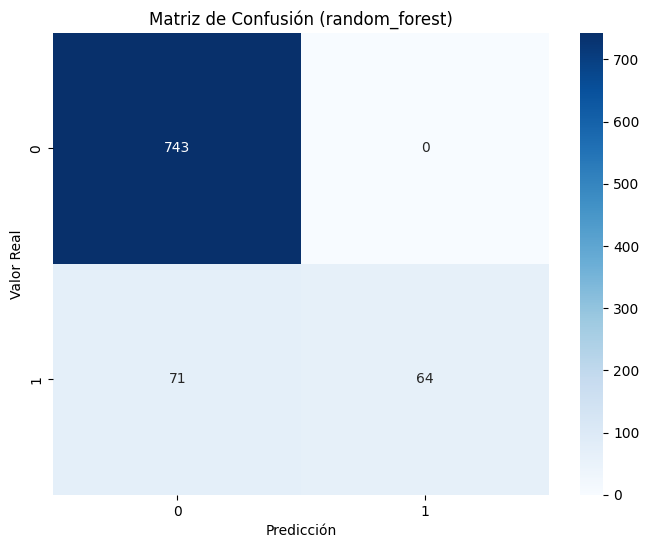

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 1\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


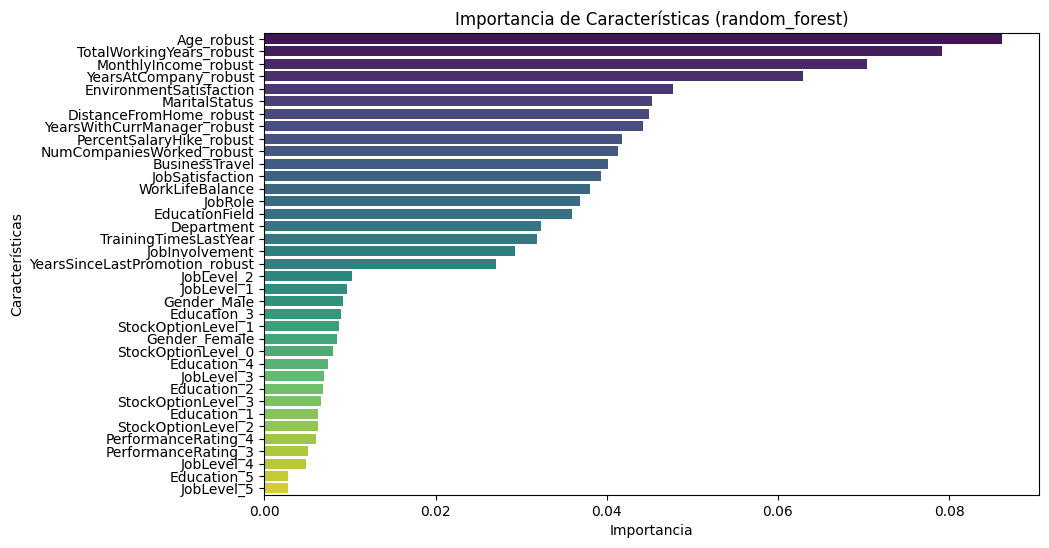

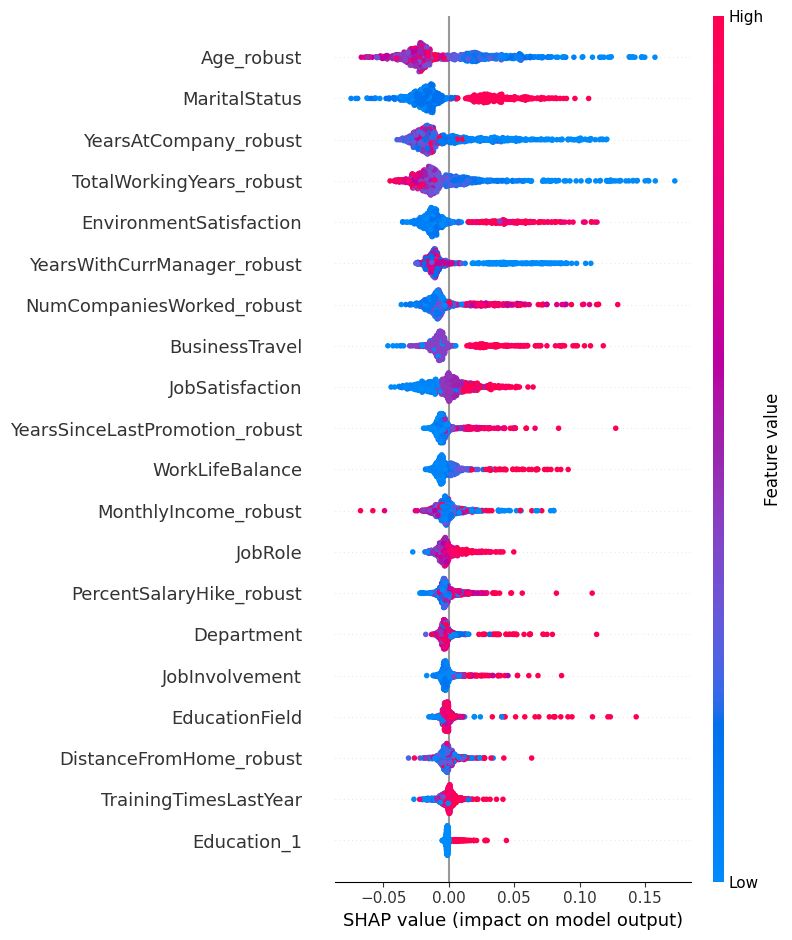

In [31]:
logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest') 
logistica.plot_shap_summary(modelo_nombre="random_forest")

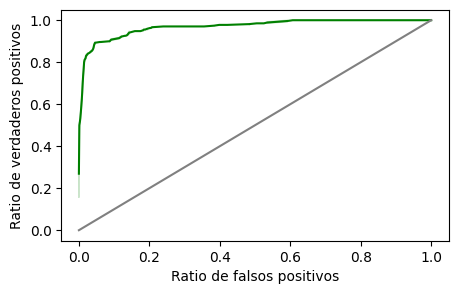

In [32]:
logistica.graficar_roc('random_forest')

Aparentemente es un buen modelo pero, y su curva es casi ideal en un grado donde se pueda predecir al 100% pero tenemos valores muy distantes para el Kappa por lo que no sería muy seguro apostar por su legitimidad.

Sin embargo, aquí se ve cómo el modelo está siendo influenciado por las variables que se considerarían normalmente predictoras para estos casos como las numéricas y las referentes a sus evalucaciones, además de sus autoevaluaciones en relación a su trabajo en temas de satisfacción.

## Gradient Booster

In [18]:
logistica.ajustar_modelo("gradient_boosting", param_grid=params_grid_tree) # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_grad = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting")
df_grad.head().T

El mejor modelo es GradientBoostingClassifier(max_depth=15, min_samples_leaf=4,
                           min_samples_split=6)


,train,test
accuracy,1.000000,0.985194
precision,1.000000,0.985292
recall,1.000000,0.985194
f1,1.000000,0.984934
kappa,1.000000,0.941141
auc,1.000000,0.996381
time_seconds,0.049946,NaN
n_jobs,8.000000,NaN
tiempo_computacion(segundos),NaN,0.049946
nucleos_usados,NaN,8.000000


Podríamos decir que este es un modelo casi perfecto, recordando que este aprende de sus errores a medida que avanza en los árboles que crea. 

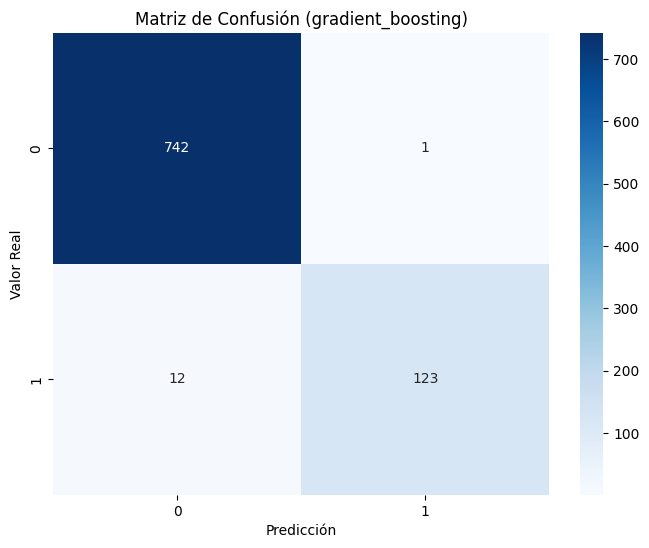

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 1\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


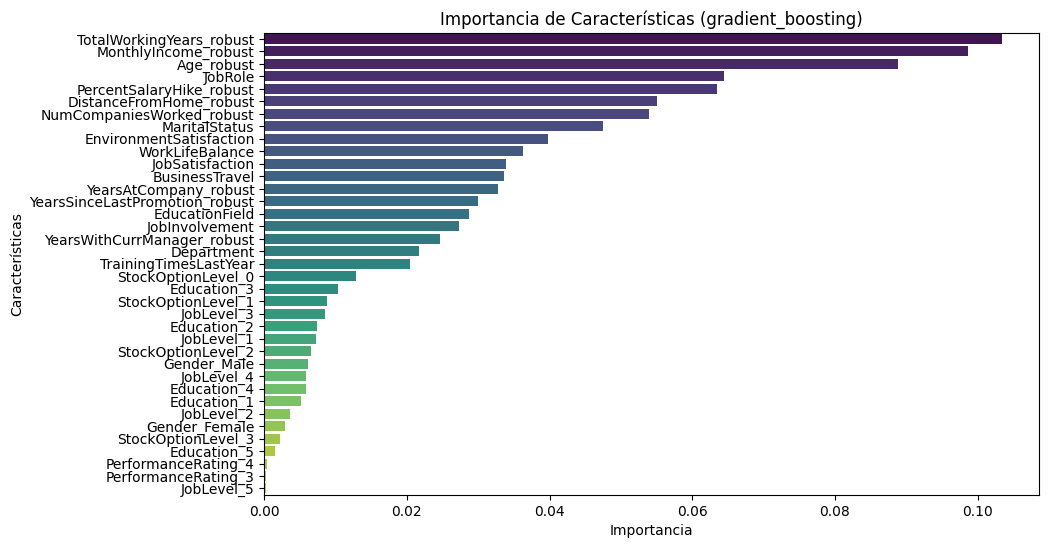

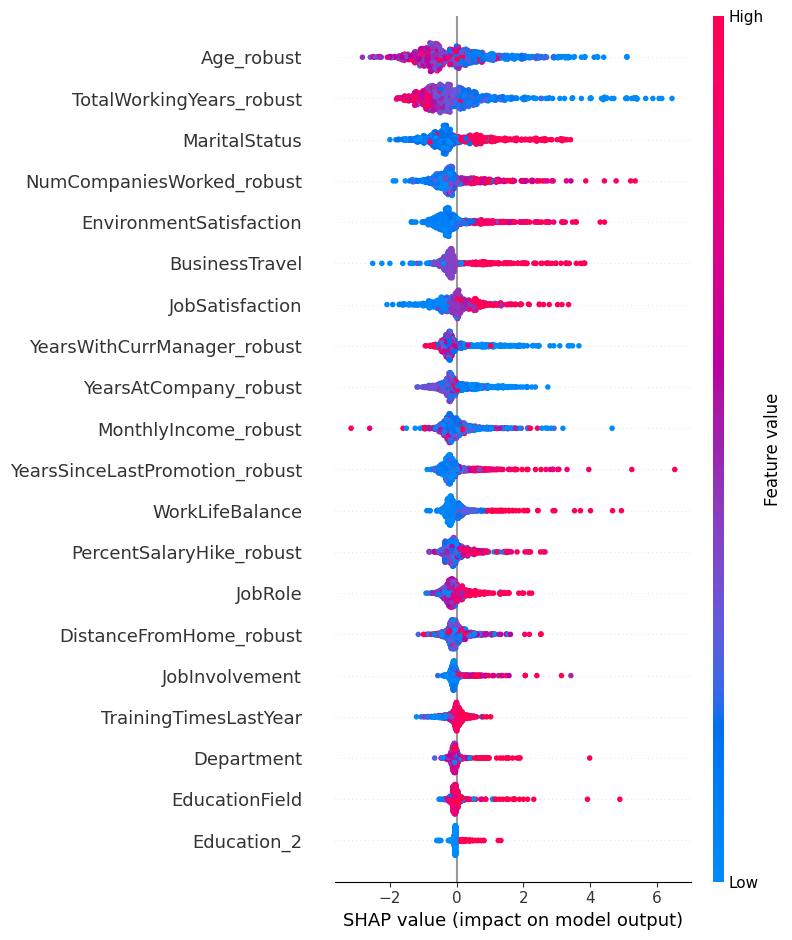

In [19]:
logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting') 
logistica.plot_shap_summary(modelo_nombre="gradient_boosting")

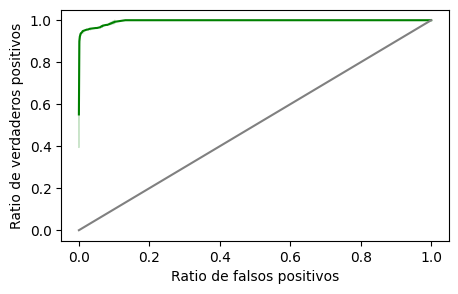

In [20]:
logistica.graficar_roc('gradient_boosting')

## XGBoost

In [21]:
logistica.ajustar_modelo("xgboost") # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_xgb = logistica.calcular_metricas(modelo_nombre =  "xgboost")
df_xgb.head().T

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,train,test
accuracy,1.000000,0.985194
precision,1.000000,0.985448
recall,1.000000,0.985194
f1,1.000000,0.984883
kappa,1.000000,0.940770
auc,1.000000,0.998235
time_seconds,0.044583,NaN
n_jobs,NaN,NaN
tiempo_computacion(segundos),NaN,0.044583
nucleos_usados,NaN,NaN


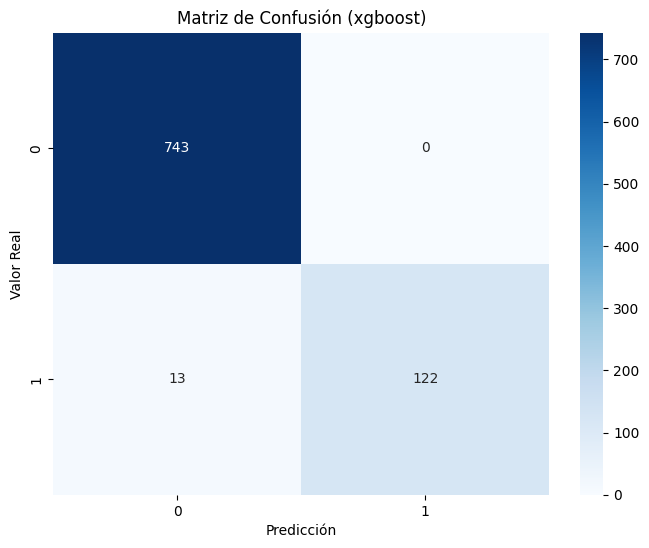

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 1\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


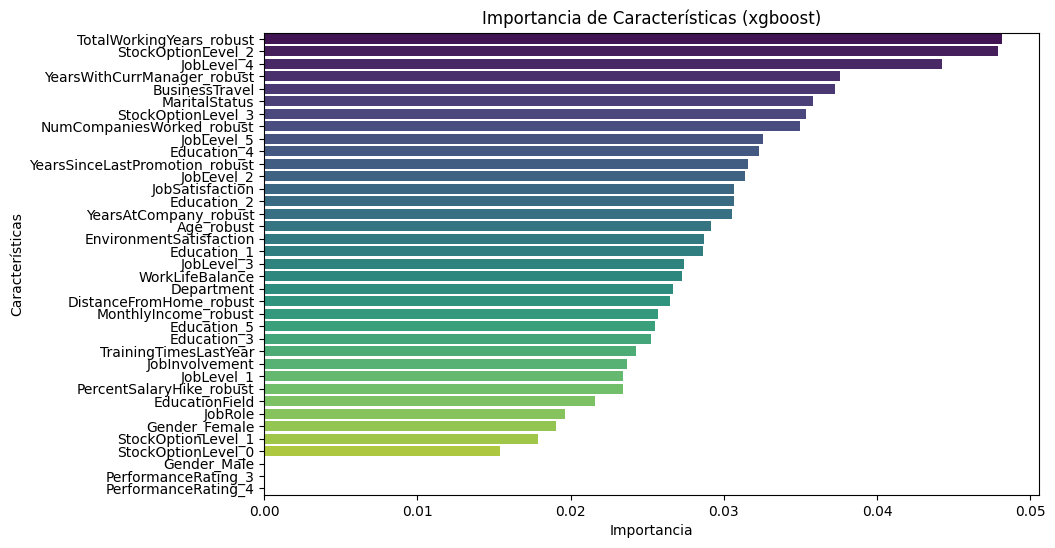

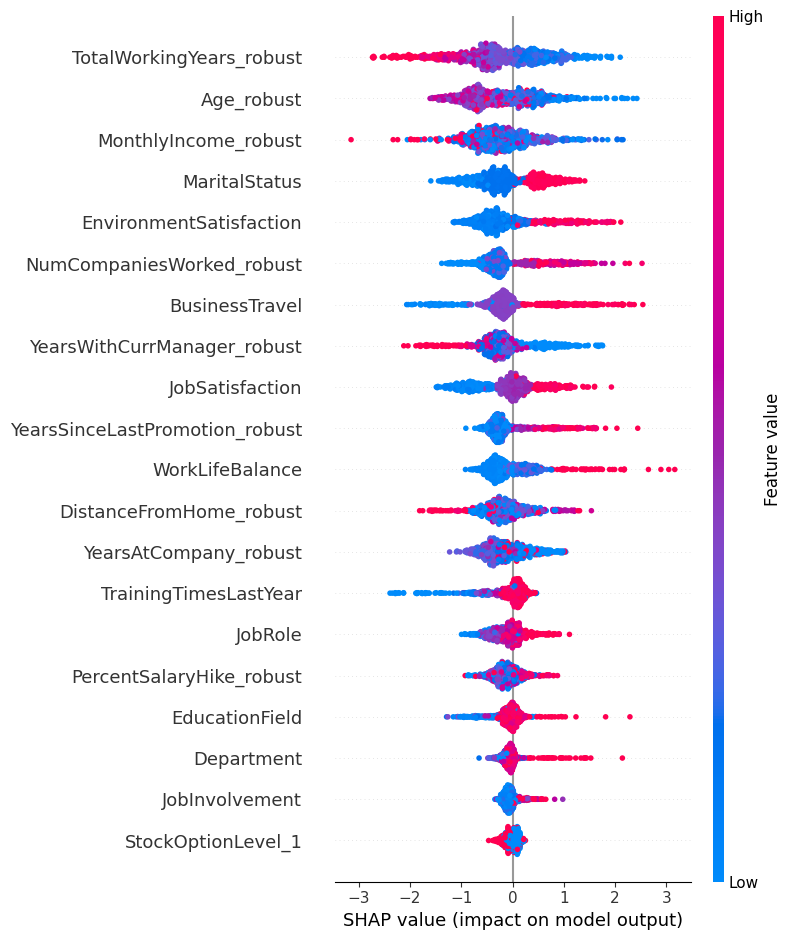

In [22]:
logistica.plot_matriz_confusion("xgboost")
logistica.importancia_predictores(modelo_nombre ='xgboost') 
logistica.plot_shap_summary(modelo_nombre="xgboost")

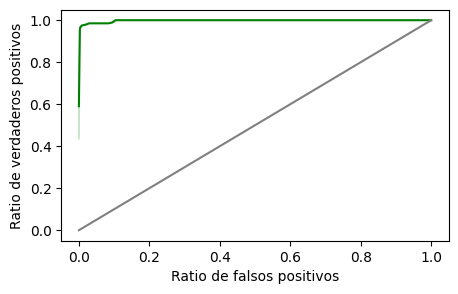

In [23]:
logistica.graficar_roc('xgboost')

## Unión de modelos para comparar

In [24]:
df_xgb['modelo'] = 'xgboost'
df_grad['modelo'] = 'gradient_boosting'
df_logreg['modelo'] = 'regresion logistica'
df_dectree['modelo'] = 'decision tree'
df_random['modelo'] = 'random_forest'

In [25]:
df_modelos = pd.concat([df_xgb, df_grad, df_logreg, df_dectree, df_random])

In [26]:
df_modelos
df_modelos.reset_index(drop=True, inplace=True)
df_concatenado = df_modelos.style.apply(sle.color_filas_por_modelo, axis=1)

In [27]:
df_concatenado

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.044583,nan,nan,nan,xgboost
1,0.985194,0.985448,0.985194,0.984883,0.940770,0.998235,nan,nan,0.044583,nan,xgboost
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.049946,8.000000,nan,nan,gradient_boosting
3,0.985194,0.985292,0.985194,0.984934,0.941141,0.996381,nan,nan,0.049946,8.000000,gradient_boosting
4,0.843634,0.845077,0.843634,0.780779,0.078708,0.766153,0.002965,nan,nan,nan,regresion logistica
5,0.856492,0.855034,0.856492,0.802787,0.125014,0.789273,nan,nan,0.002965,nan,regresion logistica
6,0.988892,0.988893,0.988892,0.988783,0.958545,0.998470,0.004777,8.000000,nan,nan,decision tree
7,0.905467,0.902611,0.905467,0.903807,0.624210,0.825338,nan,nan,0.004777,8.000000,decision tree
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.150228,-1.000000,nan,nan,random_forest
9,0.956720,0.958826,0.956720,0.953715,0.812040,0.988271,nan,nan,0.150228,-1.000000,random_forest


Entre mis modelos, debo descartar primero los que tienen métricas más distantes como son la regresión logística, el decision tree y el random forest. De esta forma me quedo con solo dos: gradient boosting y xgboost.

En estos casos, los valores de precision y recall son muy similares pero me quedo con el xgboost.
 - Este tiene menos tiempo de computación, además de que una precision ligeramente por encima del gradient. Además que este se enfoca en los falsos positivos. Por lo que prefiero quedarme con un modelo que me señale posibles casos de salida, aunque se equivoque pero de esta manera pueda intentar intervenir aunque no sea la intención del empleado partir. Pero al hacer esto puede que las acciones que utilice con estos casos haga eco de aquellos que sí pensaban en partir.